## 加载数据与基础包

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
此次加载的数据是手写数字图像8*8像素数据
digits = datasets.load_digits()

## 加载具体数据

In [16]:
# 输出样本介绍
# print(digits.DESCR)
# 加载数据集,sklearn里的数据集都是data
X = digits.data
#加载标记集
Y = digits.target
# 输出数据集大小，并由此确认加载成功数据
print(X.shape)

(1797, 64)


## 绘制出数据代表图片，使得对数据有更多了解

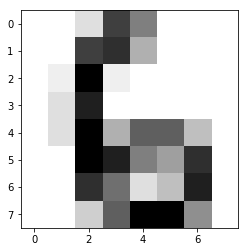

6


In [19]:
# 提取样例数据中的其中一个数据
# 提取的原因是在此处采用绘图进行绘制图像
test_num = 321
some_data = X[test_num]
image = some_data.reshape(8, 8)
plt.imshow(image, cmap = matplotlib.cm.binary)
plt.show()
print(Y[test_num])

## 切割训练集与测试集

In [20]:
# 加载将数据集切割成训练集与测试集的包
# 这个包作用是将数据集打乱，然后分成两部分
from sklearn.model_selection import train_test_split
# 下面的函数是切割函数，第一二个参数是数据集与结果集
# 然后test_size意思是将数据集百分之多少当做测试集
# 第random_state是随机种子用于保证随机后的数据的可重现性
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.2, random_state=111)
# 输出训练集的行数，并且以此确定数据集成功分割
print(X_train.shape)

(1437, 64)


## 具体训练过程

In [21]:
# 从sklearn模块中的neighbors加载KNeighborsClassfier分类器
from sklearn.neighbors import KNeighborsClassifier
# 初始化分类器，在此同时可以进行超参数的调参
# 下面的超参数是k值，即最近邻队中的投票总数
KNN = KNeighborsClassifier(n_neighbors=5)
# 输入训练集进行训练数据
KNN.fit(X_train,Y_train)
# 进行预测
Y_predict = KNN.predict(X_test)
# 输出训练结果，并且由此确认训练成功
# print(Y_predict)
# sklearn中的自带的函数测试结果的准确性
print(KNN.score(X_test, Y_test))
# 自行计算测试集中正确结果的个数
right = sum(Y_predict == Y_test)
print(right)
# 计算正确率
print(right/Y_test.shape)

0.977777777778
352
[ 0.97777778]


## 网格搜索

In [29]:
# 以以下格式设置需要搜索的参数
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 15)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 15)],
        'p': [i for i in range(1,6)]
    }
]

In [32]:
# 加载网格搜索的包
from sklearn.model_selection import GridSearchCV
# 创建用于网格搜索的KNN分类器
KNN_GS = KNeighborsClassifier()
# 将分类器和参数变量传入网格搜索分类器进行初始化
# 参数的意思是,n_jobs是指用计算机的几个核来计算，-1指用全部核计算。
# verbose指的是在计算过程之中输出的相关信息量
grid_search = GridSearchCV( KNN_GS, param_grid, n_jobs=-1, verbose=2)

In [33]:
%%time
# 开始进行模型训练,由于会很长时间，所以用%%time来计时
grid_search.fit(X_train, Y_train)
# 在输出的第一行信息为
# Fitting 3 folds for each of 84 candidates, totalling 252 fits
# 意思是为84个方案中的每一个拟合3次，共计252次

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.8s


Wall time: 1min 3s


[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  1.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [38]:
# 这一句话意思是获取所获得的最佳模型
KNN_best = grid_search.estimator
# 这一句话意思是输出最优模型的最佳成绩
# 不过要注意是这里计算最佳成绩的计算方法与分类器中的不同
print(grid_search.best_score_)
# 这里是输出最佳模型遍历列表中获取的最佳参数
print(grid_search.best_params_)

0.989561586639
{'n_neighbors': 1, 'p': 4, 'weights': 'distance'}


In [40]:
# 此处为用模型的具体方法计算成绩
KNN_best.fit(X_train, Y_train)
KNN_best.score(X_test, Y_test)

0.97777777777777775